In [1]:
import json
with open("train_origin.json", "r") as f:
    content = f.read()
    data = json.loads(content)

In [2]:
all_cuisine = set([data[id]['cuisine'] for id in data])

In [3]:
all_cuisine = sorted(list(all_cuisine))

In [4]:
all_cuisine

['brazilian',
 'british',
 'cajun_creole',
 'chinese',
 'filipino',
 'french',
 'greek',
 'indian',
 'irish',
 'italian',
 'jamaican',
 'japanese',
 'korean',
 'mexican',
 'moroccan',
 'russian',
 'southern_us',
 'spanish',
 'thai',
 'vietnamese']

In [5]:
data["0"]

{'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [8]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")
lengths = [len(tokenizer.encode(" [SEP] ".join(data[id]['ingredients']))) for id in data]

In [84]:
" [SEP] ".join(data["0"]['ingredients'])

'romaine lettuce [SEP] black olives [SEP] grape tomatoes [SEP] garlic [SEP] pepper [SEP] purple onion [SEP] seasoning [SEP] garbanzo beans [SEP] feta cheese crumbles'

In [10]:
max(lengths)

266

In [20]:
len([length for length in lengths if length>=100]) / len(lengths)

0.002702787642603476

In [15]:
import numpy as np
x = np.arange(300)
y = np.array([lengths.count(length) for length in range(300)])

Text(0, 0.5, 'number of text')

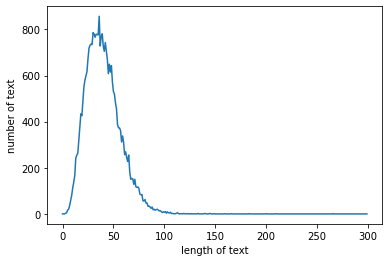

In [17]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("length of text")
plt.ylabel("number of text")

In [85]:
y = np.array([lengths.count(length) for length in range(300)])

In [87]:
(100*np.cumsum(y) / sum(y)) [100]

99.75172067003992

Text(0, 0.5, 'cumulative proportion of text / %')

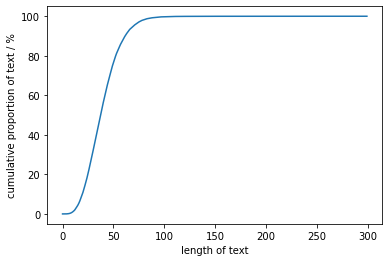

In [18]:
import matplotlib.pyplot as plt
plt.plot(x, 100*np.cumsum(y) / sum(y))
plt.xlabel("length of text")
plt.ylabel("cumulative proportion of text / %")

In [21]:
all_cuisine = set([data[id]['cuisine'] for id in data])

In [22]:
all_cuisine_list = [data[id]['cuisine'] for id in data]

In [23]:
all_cuisine_count = {cuisine:0 for cuisine in all_cuisine}
for cuisine in all_cuisine_list:
    all_cuisine_count[cuisine] += 1
all_cuisine_count

{'indian': 2381,
 'cajun_creole': 1253,
 'chinese': 2126,
 'japanese': 1157,
 'mexican': 5151,
 'british': 631,
 'moroccan': 659,
 'jamaican': 433,
 'brazilian': 367,
 'vietnamese': 645,
 'irish': 519,
 'southern_us': 3454,
 'italian': 6308,
 'french': 2122,
 'korean': 649,
 'spanish': 798,
 'filipino': 615,
 'russian': 401,
 'greek': 929,
 'thai': 1221}

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


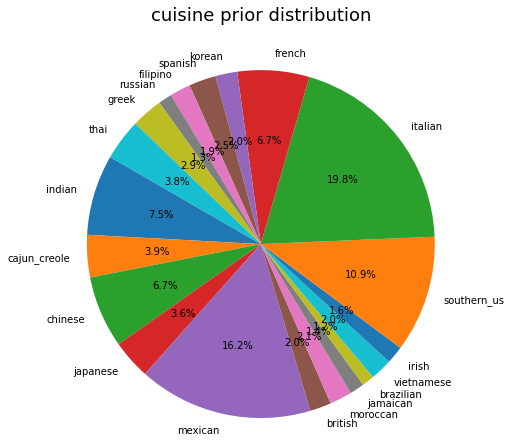

In [82]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

labels = list(all_cuisine_count.keys())
sizes = [all_cuisine_count[label] for label in labels]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150,radius=2)
plt.title("cuisine prior distribution",y=1.5,fontsize=18)
plt.show()  

In [77]:
help(plt.title)

Help on function title in module matplotlib.pyplot:

title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
    Set a title for the axes.
    
    Set one of the three available axes titles. The available titles
    are positioned above the axes in the center, flush with the left
    edge, and flush with the right edge.
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default *fontdict* is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight': rcParams['axes.titleweight'],
            'color': rcParams['axes.titlecolor'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, default: :rc:`axes.titlelocation`
        Which title to set.
    
    y : float, default: :rc:`axes.titley`
        Vertical axes loation for the title (1.0 i

In [24]:
len(data)

31819

In [55]:
all_ingredients_list = [data[id]['ingredients'] for id in data]

In [56]:
num_ingredients_list = [len(ingredients) for ingredients in all_ingredients_list]

Text(0, 0.5, 'cumulative proportion of samples / %')

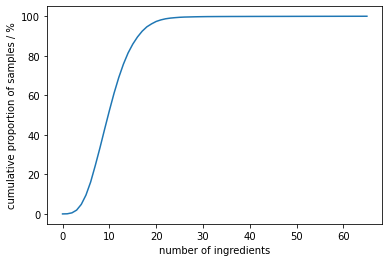

In [57]:
import matplotlib.pyplot as plt
x = np.arange(max(num_ingredients_list)+1)
y = np.ones_like(x)
for n in num_ingredients_list:
    y[n] += 1
plt.plot(x, 100*np.cumsum(y) / sum(y))
plt.xlabel("number of ingredients")
plt.ylabel("cumulative proportion of samples / %")

In [58]:
(100*np.cumsum(y) / sum(y))

array([3.13627097e-03, 6.58616905e-02, 5.39438607e-01, 1.90998902e+00,
       4.81417594e+00, 9.52799122e+00, 1.61423867e+01, 2.45538655e+01,
       3.35330093e+01, 4.29951388e+01, 5.22440019e+01, 6.10600596e+01,
       6.89571899e+01, 7.57628979e+01, 8.14332758e+01, 8.58930532e+01,
       8.95029011e+01, 9.24164968e+01, 9.46369766e+01, 9.61329779e+01,
       9.73686687e+01, 9.81527364e+01, 9.87078564e+01, 9.90559824e+01,
       9.92817939e+01, 9.94636977e+01, 9.95828760e+01, 9.96393288e+01,
       9.97020543e+01, 9.97522346e+01, 9.97867336e+01, 9.98180963e+01,
       9.98306414e+01, 9.98463227e+01, 9.98557315e+01, 9.98651403e+01,
       9.98776854e+01, 9.98808217e+01, 9.98870942e+01, 9.98902305e+01,
       9.99027756e+01, 9.99059119e+01, 9.99090481e+01, 9.99153207e+01,
       9.99184570e+01, 9.99215932e+01, 9.99247295e+01, 9.99278658e+01,
       9.99310020e+01, 9.99404109e+01, 9.99435471e+01, 9.99466834e+01,
       9.99529559e+01, 9.99560922e+01, 9.99592285e+01, 9.99623647e+01,
      

In [59]:
max(num_ingredients_list)

65

In [60]:
len_all_ingredients_list = [len(tokenizer.encode(ingredient)) for ingredients in all_ingredients_list for ingredient in ingredients]

Text(0, 0.5, 'cumulative proportion of cuisines in samples / %')

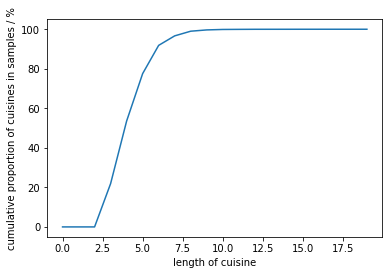

In [61]:
import matplotlib.pyplot as plt
x = np.arange(max(len_all_ingredients_list)+1)
y = np.ones_like(x)
for n in len_all_ingredients_list:
    y[n] += 1
plt.plot(x, 100*np.cumsum(y) / sum(y))
plt.xlabel("length of cuisine")
plt.ylabel("cumulative proportion of cuisines in samples / %")

In [62]:
100*np.cumsum(y) / sum(y)

array([2.92228476e-04, 5.84456952e-04, 8.76685428e-04, 2.18893740e+01,
       5.35464848e+01, 7.75480862e+01, 9.18447799e+01, 9.66484316e+01,
       9.90058387e+01, 9.96583849e+01, 9.98901221e+01, 9.99398009e+01,
       9.99774984e+01, 9.99833430e+01, 9.99871419e+01, 9.99944477e+01,
       9.99953243e+01, 9.99970777e+01, 9.99988311e+01, 1.00000000e+02])

In [66]:
type(tokenizer.encode("123"))

list

In [67]:
import torch
torch.Tensor([[1,2,3],[4,5,6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])